In [1]:
import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

In [2]:
data = dt.get_data('Calu3', 'healthy', 'sars-cov2')
columns_healthy = dt.get_columns('Calu3', 'healthy')
columns_sars_cov2 = dt.get_columns('Calu3', 'sars-cov2')

filtered_data = dt.get_p_values('welch', data, columns_healthy, columns_sars_cov2)
filtered_data

,Series7_Calu3_Mock_1,Series7_Calu3_Mock_2,Series7_Calu3_Mock_3,Series7_Calu3_SARS-CoV-2_1,Series7_Calu3_SARS-CoV-2_2,Series7_Calu3_SARS-CoV-2_3,p-value
ISG15,6.251904,7.235619,7.793174,8.923458,8.238008,9.009570,0.033500
TNFRSF9,2.397895,0.693147,2.484907,5.273000,4.804021,5.375278,0.005678
CA6,1.098612,1.098612,1.609438,0.693147,0.000000,0.693147,0.048269
NPPA-AS1,1.098612,2.639057,2.564949,0.000000,0.000000,0.693147,0.027635
TNFRSF8,0.000000,0.000000,0.000000,1.386294,0.693147,1.386294,0.007490
...,...,...,...,...,...,...,...
MUM1L1,2.079442,1.386294,1.609438,0.693147,0.000000,0.693147,0.016305
CLDN2,6.270988,6.741701,7.651596,4.465908,3.526361,4.753590,0.008605
IL13RA2,0.693147,0.693147,1.386294,2.302585,1.945910,2.197225,0.008535
FAM122C,3.218876,3.555348,4.077537,4.615121,4.248495,4.718499,0.034048


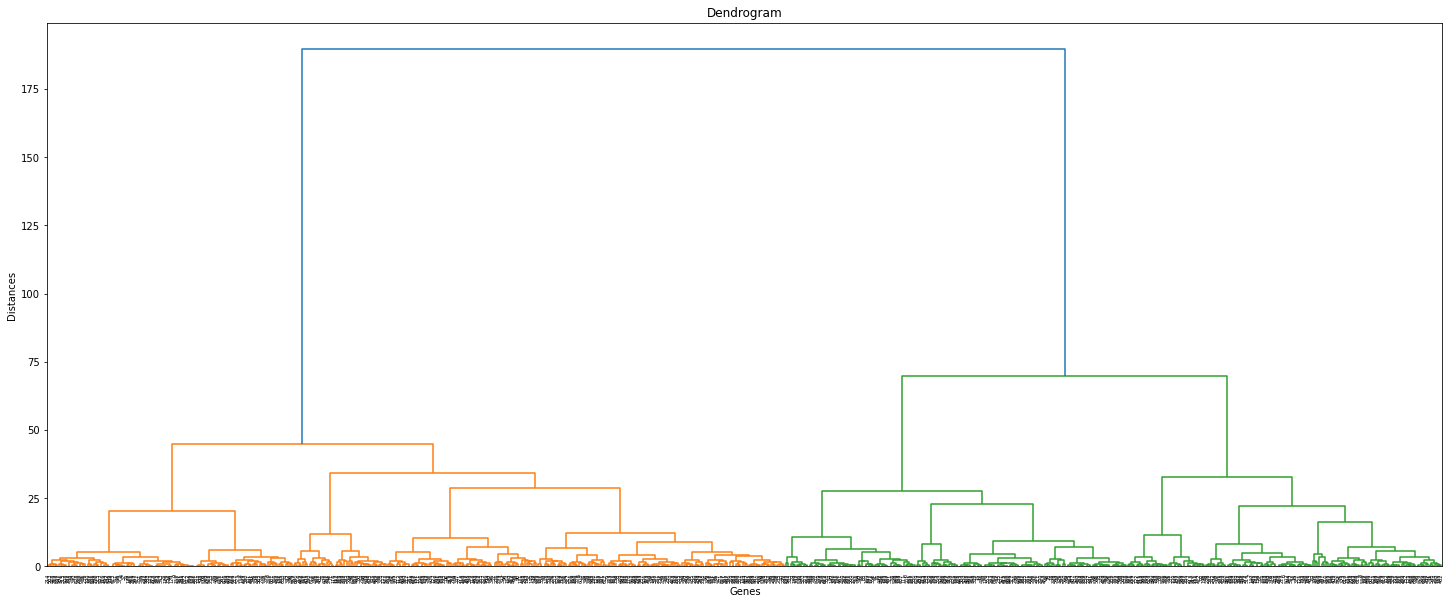

In [3]:
filtered_data.drop(['p-value'], axis = 1, inplace = True)
dt.plot_dendrogram(filtered_data)

In [29]:
labels = {}

models = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')
labels['distance'] = models.fit_predict(filtered_data[columns_sars_cov2])

In [30]:
labels['distance']

array([3, 2, 0, 0, 0, 0, 1, 1, 2, 0, 3, 1, 1, 1, 1, 3, 3, 3, 1, 2, 2, 2,
       2, 0, 0, 1, 0, 0, 0, 3, 2, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 2, 1,
       0, 0, 1, 3, 0, 2, 0, 2, 2, 3, 3, 1, 0, 2, 1, 2, 0, 0, 1, 3, 3, 3,
       1, 1, 0, 2, 0, 0, 0, 0, 0, 2, 1, 3, 1, 0, 1, 0, 1, 1, 0, 0, 0, 2,
       1, 1, 2, 0, 2, 2, 2, 0, 2, 0, 0, 0, 3, 0, 1, 0, 2, 0, 2, 0, 1, 2,
       0, 3, 0, 2, 2, 1, 0, 0, 2, 0, 3, 2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 2,
       0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 2, 3, 2, 2, 0, 2, 2, 2,
       2, 0, 1, 2, 3, 3, 3, 0, 3, 0, 1, 1, 1, 2, 1, 0, 1, 2, 3, 0, 2, 1,
       0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 1, 3, 2, 2, 0, 0, 2, 2, 2, 2, 2, 3,
       2, 2, 0, 3, 3, 1, 0, 0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 2, 1, 1, 2, 0, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 2,
       1, 0, 1, 0, 1, 1, 0, 1, 3, 1, 0, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 2,
       2, 0, 0, 0, 0, 0, 0, 2, 1, 3, 2, 1, 0, 2, 2, 0, 0, 0, 3, 0, 2, 3,
       2, 0, 0, 1, 0, 2, 0, 3, 2, 2, 2, 1, 0, 2, 0,

In [31]:
dissimilarity = 1 - np.abs(filtered_data.T.corr())

m = squareform(dissimilarity)

m[np.abs(m) < 1e-12] = 0

hierarchy = linkage(m, method='ward')
labels['pearson'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [32]:
labels['pearson']

array([0, 2, 1, 1, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1,
       0, 1, 2, 0, 2, 2, 2, 0, 0, 2, 1, 0, 0, 1, 2, 2, 2, 0, 0, 0, 2, 0,
       1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 0, 2, 1, 2, 1, 1, 1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2,
       1, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1,
       2, 1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0,
       2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 1, 1, 2, 2, 0, 2, 1, 2, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 1, 2, 1, 2,
       0, 0, 0, 2, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0,
       1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,

In [33]:
dissimilarity = 1 - np.abs(filtered_data.T.corr(method='spearman'))
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['spearman'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [34]:
labels['spearman']

array([0, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 1, 0,
       2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 1, 0, 1, 0, 2,
       2, 0, 2, 2, 0, 2, 2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2,
       2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 2,
       1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 1, 0, 1, 2, 2, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2, 2, 0, 2, 2, 2, 1,
       0, 0, 0, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0,
       2, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [35]:
from itertools import groupby

clusters = {}

for key1, label1 in labels.items():
    clusters[key1] = [list(map(lambda x: x[0], v)) for k,v in groupby(sorted(zip(filtered_data.index, labels['spearman']), key = lambda x: x[1]), lambda s: s[1])]
    
    for key2, label2 in labels.items():
        if key1 != key2:
            print(key1, ' vs ', key2, ': ', adjusted_rand_score(label1, label2))

distance  vs  pearson :  0.0627435037731443
distance  vs  spearman :  0.04597060645880481
pearson  vs  distance :  0.0627435037731443
pearson  vs  spearman :  0.6429717301473334
spearman  vs  distance :  0.04597060645880481
spearman  vs  pearson :  0.6429717301473334


In [ ]:
i = 0
for c in clusters['distance']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['pearson']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['spearman']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

## Clustering on columns

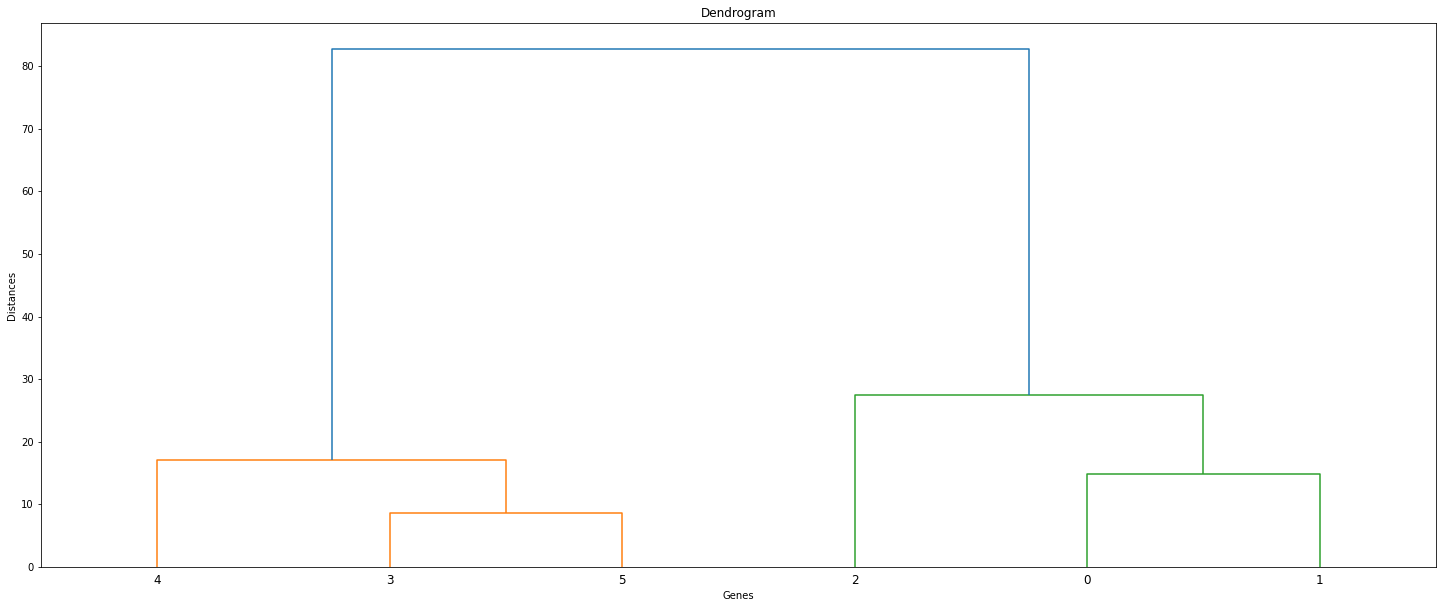

In [18]:
dt.plot_dendrogram(filtered_data.T)

In [19]:
labels_columns = {}

models = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
labels_columns['distance'] = models.fit_predict(filtered_data.T)

labels_true = [0 if col in columns_healthy else 1 for col in filtered_data.columns]

print("True: ", labels_true)
print("Predicted: ", labels_columns['distance'])
print(adjusted_rand_score(labels_true, labels_columns['distance']))

True:  [0, 0, 0, 1, 1, 1]
Predicted:  [0 0 0 1 1 1]
1.0
